#### 作业要求

西瓜数据集 3.0α 

| 编号 | 色泽 | 根蒂 | 敲声 | 纹理 | 脐部 | 触感 | 密度  | 含糖率 | 好瓜 |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ----- | ------ | ---- |
| 1    | 青绿 | 蜷缩 | 浊响 | 清晰 | 凹陷 | 硬滑 | 0.697 | 0.46   | 是   |
| 2    | 乌黑 | 蜷缩 | 沉闷 | 清晰 | 凹陷 | 硬滑 | 0.774 | 0.376  | 是   |
| 3    | 乌黑 | 蜷缩 | 浊响 | 清晰 | 凹陷 | 硬滑 | 0.634 | 0.264  | 是   |
| 4    | 青绿 | 蜷缩 | 沉闷 | 清晰 | 凹陷 | 硬滑 | 0.608 | 0.318  | 是   |
| 5    | 浅白 | 蜷缩 | 浊响 | 清晰 | 凹陷 | 硬滑 | 0.556 | 0.215  | 是   |
| 6    | 青绿 | 稍蜷 | 浊响 | 清晰 | 稍凹 | 软粘 | 0.403 | 0.237  | 是   |
| 7    | 乌黑 | 稍蜷 | 浊响 | 稍糊 | 稍凹 | 软粘 | 0.481 | 0.149  | 是   |
| 8    | 乌黑 | 稍蜷 | 浊响 | 清晰 | 稍凹 | 硬滑 | 0.437 | 0.211  | 是   |
| 9    | 乌黑 | 稍蜷 | 沉闷 | 稍糊 | 稍凹 | 硬滑 | 0.666 | 0.091  | 否   |
| 10   | 青绿 | 硬挺 | 清脆 | 清晰 | 平坦 | 软粘 | 0.243 | 0.267  | 否   |
| 11   | 浅白 | 硬挺 | 清脆 | 模糊 | 平坦 | 硬滑 | 0.245 | 0.057  | 否   |
| 12   | 浅白 | 蜷缩 | 浊响 | 模糊 | 平坦 | 软粘 | 0.343 | 0.099  | 否   |
| 13   | 青绿 | 稍蜷 | 浊响 | 稍糊 | 凹陷 | 硬滑 | 0.639 | 0.161  | 否   |
| 14   | 浅白 | 稍蜷 | 沉闷 | 稍糊 | 凹陷 | 硬滑 | 0.657 | 0.198  | 否   |
| 15   | 乌黑 | 稍蜷 | 浊响 | 清晰 | 稍凹 | 软粘 | 0.36  | 0.37   | 否   |
| 16   | 浅白 | 蜷缩 | 浊响 | 模糊 | 平坦 | 硬滑 | 0.593 | 0.042  | 否   |
| 17   | 青绿 | 蜷缩 | 沉闷 | 稍糊 | 稍凹 | 硬滑 | 0.719 | 0.103  | 否   |

一、在西瓜数据集 3.0α 上分别用 **线性核** 和 **高斯核** 训练SVM分类器，并分析其分类误差，比较其支持向量的差别。

二、试讨论 **线性判别分析** 与 **线性核支持向量机** 在何种条件下等价。

 

线性核准确率: 52.941 %
高斯核准确率: 82.353 %


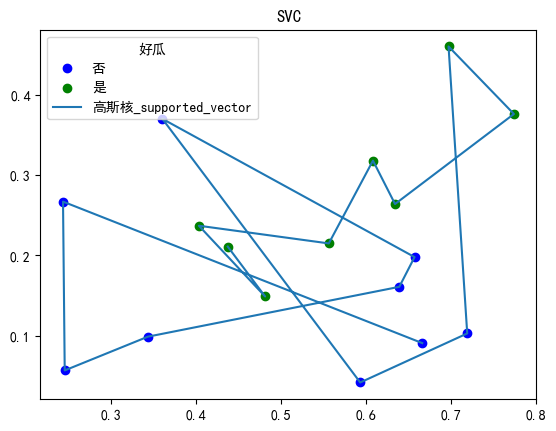

In [17]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score#返回正确的比例
from sklearn.preprocessing import LabelEncoder

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
plt.close('all')

##数据特征可视化
def visual(data,class_method):
    colormap = dict(zip(data['好瓜'].value_counts().index.tolist(),['blue','green']))#坏瓜好瓜颜色
    die = data.groupby('好瓜')    
    plt.figure()
    for species,klass in die:
        plt.scatter(klass['密度'],klass['含糖率'],
                    color = colormap[species],
                    label = species
                    )
    for name,model in class_method.items():
        sv = model.support_vectors_
    plt.plot(sv[:,0],sv[:,1],label=str(name)+'_supported_vector')    
    plt.legend(frameon=True, title='好瓜',loc="upper left")    
    plt.title('SVC')
    plt.show
#1.获取x,y
data = pd.read_csv('../Data/watermelon.csv')    
x = pd.DataFrame({'密度':data['密度'],'含糖率':data['含糖率']})
x = x.values.tolist()    
encoder = LabelEncoder()#将好瓜坏瓜映射为1/0
y = encoder.fit_transform(data['好瓜']).tolist()
x,y = np.array(x),np.array(y)    
#2.1.线性核    
linear_svm = svm.SVC(C=0.5, #惩罚参数
        kernel='linear')
linear_svm.fit(x,y)
y_pred = linear_svm.predict(x)
print('线性核准确率: %.3f'%(accuracy_score(y_pred=y_pred, y_true=y)*100),"%")    
##2.2.高斯核
gauss_svm = svm.SVC(C=0.5,
                    kernel='rbf')
gauss_svm.fit(x,y)
y_pred2 = gauss_svm.predict(x)
print('高斯核准确率: %.3f'%(accuracy_score(y_pred=y_pred2, y_true=y)*100),"%")   
class_method = {'线性核':linear_svm,'高斯核':gauss_svm}
visual(data,class_method)